# Drive mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
% matplotlib inline
sns.set()

# Define directory on workspace


In [7]:
WORK_DIR = "/content/drive/MyDrive/kaggle/happy_whale"

submission_file_path = os.path.join(WORK_DIR, "./data/sample_submission.csv")
train_csv_file_path = os.path.join(WORK_DIR, "./data/train.csv")

# Train data

In [15]:
train_df = pd.read_csv(train_csv_file_path)
test_df = pd.read_csv(submission_file_path)

concat_df = pd.concat([train_df['image'], test_df['image']])
image_name_to_image_id = dict((image_name, index) for index, image_name in enumerate(concat_df.unique()))
image_id_to_image_name = {v: k for k, v in image_name_to_image_id.items()}
image_ids = [image_name_to_image_id[image_name] for image_name in train_df['image']]
train_df['image_id'] = image_ids
individual_id_to_label = dict((i_id, index) for index, i_id in enumerate(train_df['individual_id'].unique()))
individual_id_to_label['new_individual'] = train_df["individual_id"].unique().shape[0]
label_to_individual_id = {v: k for k, v in individual_id_to_label.items()}
train_df['label'] = [individual_id_to_label[i_id] for i_id in train_df['individual_id']]
image_id_to_label = dict(zip(train_df["image_id"], train_df["label"]))

## Correct name missmatching

In [16]:
train_df["species"] = train_df["species"].replace(["bottlenose_dolpin", "kiler_whale",
                                             "beluga", 
                                             "globis", "pilot_whale"],
                                            ["bottlenose_dolphin", "killer_whale",
                                             "beluga_whale", 
                                             "short_finned_pilot_whale", "short_finned_pilot_whale"])
train_df

,image,species,individual_id,image_id,label
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,0,0
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,1,1
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,2,2
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,3,3
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,4,4
...,...,...,...,...,...
51028,fff639a7a78b3f.jpg,beluga_whale,5ac053677ed1,51028,96
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3,51029,1482
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9,51030,8220
51031,fffbc5dd642d8c.jpg,beluga_whale,4000b3d7c24e,51031,13202


## Add category column

In [17]:
train_df["category"] = train_df["species"].map(lambda x:x.split("_")[-1])
train_df

,image,species,individual_id,image_id,label,category
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,0,0,whale
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,1,1,whale
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,2,2,whale
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,3,3,dolphin
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,4,4,whale
...,...,...,...,...,...,...
51028,fff639a7a78b3f.jpg,beluga_whale,5ac053677ed1,51028,96,whale
51029,fff8b32daff17e.jpg,cuviers_beaked_whale,1184686361b3,51029,1482,whale
51030,fff94675cc1aef.jpg,blue_whale,5401612696b9,51030,8220,whale
51031,fffbc5dd642d8c.jpg,beluga_whale,4000b3d7c24e,51031,13202,whale


# Plotting
* species count
* category
* individual id

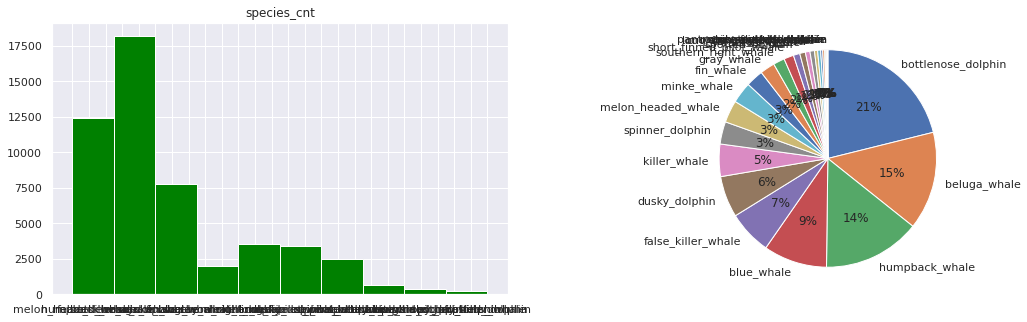

In [18]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1,2,1)
ax.hist(train_df["species"], color="green")
ax.set_title("species_cnt")
ax = fig.add_subplot(1,2,2)
cnt_species = train_df["species"].value_counts()
ax.pie(
    cnt_species,
    labels = cnt_species.index,
    autopct='%1.0f%%',
    counterclock=False,
    startangle=90
)
plt.show()

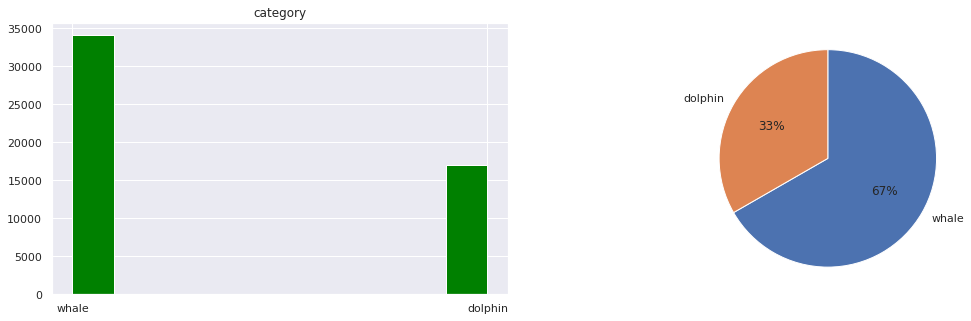

In [19]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1,2,1)
ax.hist(train_df["category"], color="green")
ax.set_title("category")
ax = fig.add_subplot(1,2,2)
cnt_species = train_df["category"].value_counts()
ax.pie(
    cnt_species,
    labels = cnt_species.index,
    autopct='%1.0f%%',
    counterclock=False,
    startangle=90
)
plt.show()

37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
               ... 
7da30c559ad2      1
882c59ba34bb      1
704e724a033f      1
08983c540e76      1
bc6fcab946c4      1
Name: individual_id, Length: 15587, dtype: int64


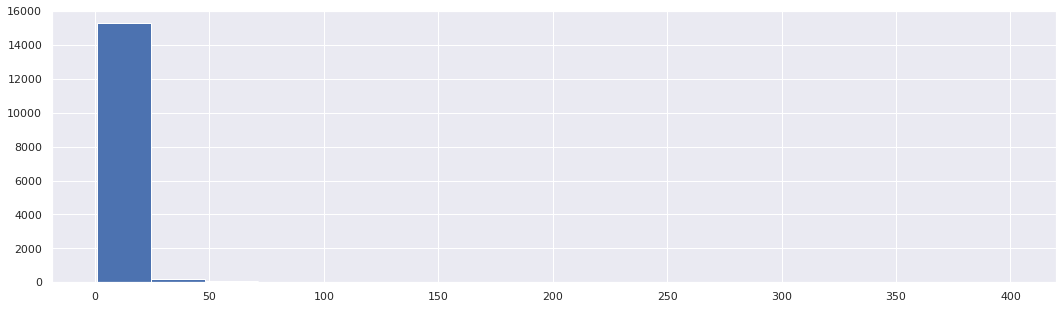

In [20]:
import numpy as np
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(1,1,1)
cnt_id = train_df["individual_id"].value_counts()
print(train_df["individual_id"].value_counts())
bins_num = int(1 + np.ceil(np.log2(train_df["individual_id"].shape[0])))
ax.hist(
    cnt_id,
    bins=bins_num
)
plt.show()

# Test Data

In [22]:
test_df

,image,predictions
0,000110707af0ba.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
1,0006287ec424cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
2,000809ecb2ccad.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
3,00098d1376dab2.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
4,000b8d89c738bd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
...,...,...
27951,fff6ff1989b5cd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
27952,fff8fd932b42cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
27953,fff96371332c16.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
27954,fffc1c4d3eabc7.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
